## Welcome!

### Some Google Colab hacks
* To run a cell, hit `Ctrl + Shift + Enter`
* To run the whole sheet, hit `Ctrl + F9`
* To run the cells above, hit `Ctrl + F8`
* To run the cells below, hit `Ctrl + F10`


# Install and import `pygismo` and other packages

`pygismo` is a small package, unknown to Google. Therefore, we have to install it locally inside the Notebook

In [1]:
!pip install pygismo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 3.9 MB/s eta 0:00:00


Now we can import it as a package

In [2]:
import pygismo as gs

We also import `numpy` and `matplotlib`

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Constructing a 1D basis

A B-spline basis is constructed via a *knot vector* Ξ.

In this example, we choose Ξ = { 0, 0, 0, 1, 1, 1 }.

In `pygismo`, a knot vector is defined in the `pygismo.nurbs.gsKnotVector` class, which uses a `numpy.vector` as input.

In [5]:
kv = gs.nurbs.gsKnotVector(np.array([0,0,0,1,1,1]),2)

If you try to print the knot vector `kv`, you will get information on the type (`pygismo.nurbs.gsKnotVector`) and the memory address (e.g. `0x7e6a3f8390f0`)

In [6]:
print(kv)

However, you can print the knots as follows:

In [8]:
print('The knots in the knot vector are:\n',kv.get())

The knots in the knot vector are:
 [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]


As soon as we have a knot vector, we can construct a B-spline basis from it. The B-spline basis is available in `pygismo.nurbs.gsBSplineBasis`

In [11]:
basis = gs.nurbs.gsBSplineBasis(kv)

Since B-spline basis can have different dimensions, the knots of the basis can be obtained by calling the knots in the 0th direction

In [12]:
print('The knots of the basis are:\n',basis.knots(0).get())

The knots of the basis are:
 [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]


Furthermore, the size of the basis is simply obtained by

In [13]:
print('The size of the basis is: ',basis.size())

The size of the basis is:  3


**Question:** Can you verify the size of the basis?

# Basis computations

In [14]:
pt = np.array([0.25])

In [15]:
basis.evalSingle(1,pt)

array([[0.375]])

**Note**: the evaluation functions require the evaluation coordinates to be passed as a matrix and not as a vector. Every column of the matrix corresponds to an evaluation point.

For the 1D basis, we create an array of evaluation points via `numpy.linspace` and transform it into a 1D `numpy.meshgrid`

In [18]:
N = 100
x = np.linspace(0,1,N)
x = np.matrix(np.meshgrid(x))
y = basis.evalSingle(0,x)

Now we evaluate all basis functions in different rows of an array; every row represents an evaluation of a basis functions, with the columns the value at each point.

In [19]:
eval = np.zeros((basis.size(),N))
for fun in range(0,basis.size()):
    eval[fun,:] = basis.evalSingle(fun,x)

To plot the basis from G+Smo, we simply plot the transpose of everything

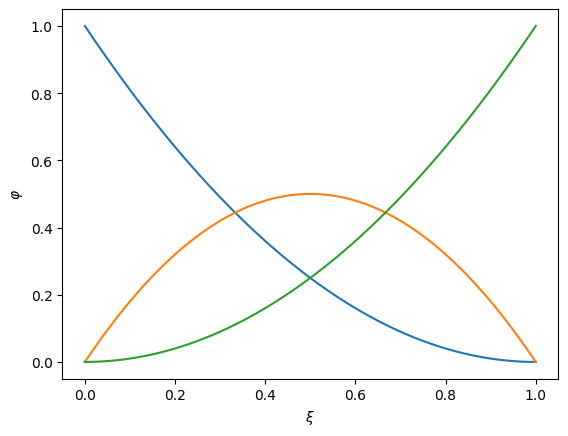

In [20]:
plt.plot(x.T,eval.T)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\varphi$')
plt.show()

**Note**: `pygismo` can also evaluate functions using `basis.eval(points)`. However, this returns only the *non-zero* basis functions, and not all basis functions.

# Knot insertion


We can insert knots in the knot vector using `pygismo.nurbs.gsKnotVector.insert(value,multiplicity)`. This inserts a knot with `value`, `multiplicity` times.

In [ ]:
newkv = gs.nurbs.gsKnotVector(np.array([0,0,0,1,1,1]),2)
newkv.insert(0.5,2)
newbasis = gs.nurbs.gsBSplineBasis(newkv)

# basis.knots(0).insert(0.5,1)
print('The knots of the basis are:\n',newbasis.knots(0).get())
print('The size of the basis is: ',newbasis.size())

The knots of the basis are:
 [0.0, 0.0, 0.0, 0.5, 0.5, 1.0, 1.0, 1.0]
The size of the basis is:  5


The new basis can be plotted

In [ ]:
eval = np.zeros((newbasis.size(),N))
for fun in range(0,newbasis.size()):
    eval[fun,:] = newbasis.evalSingle(fun,x)

plt.plot(x.T,eval.T)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\varphi$')
plt.show()